In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import math
import tensorflow as tf

In [3]:
df = pd.read_csv("cruise_ship_info.csv")
df.head(10)

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00
5,Ecstasy,Carnival,22,70.367,20.52,8.55,10.20,34.29,9.20
6,Elation,Carnival,15,70.367,20.52,8.55,10.20,34.29,9.20
7,Fantasy,Carnival,23,70.367,20.56,8.55,10.22,34.23,9.20
8,Fascination,Carnival,19,70.367,20.52,8.55,10.20,34.29,9.20
9,Freedom,Carnival,6,110.239,37.00,9.51,14.87,29.79,11.50


In [4]:
df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


c:\users\ahsun\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


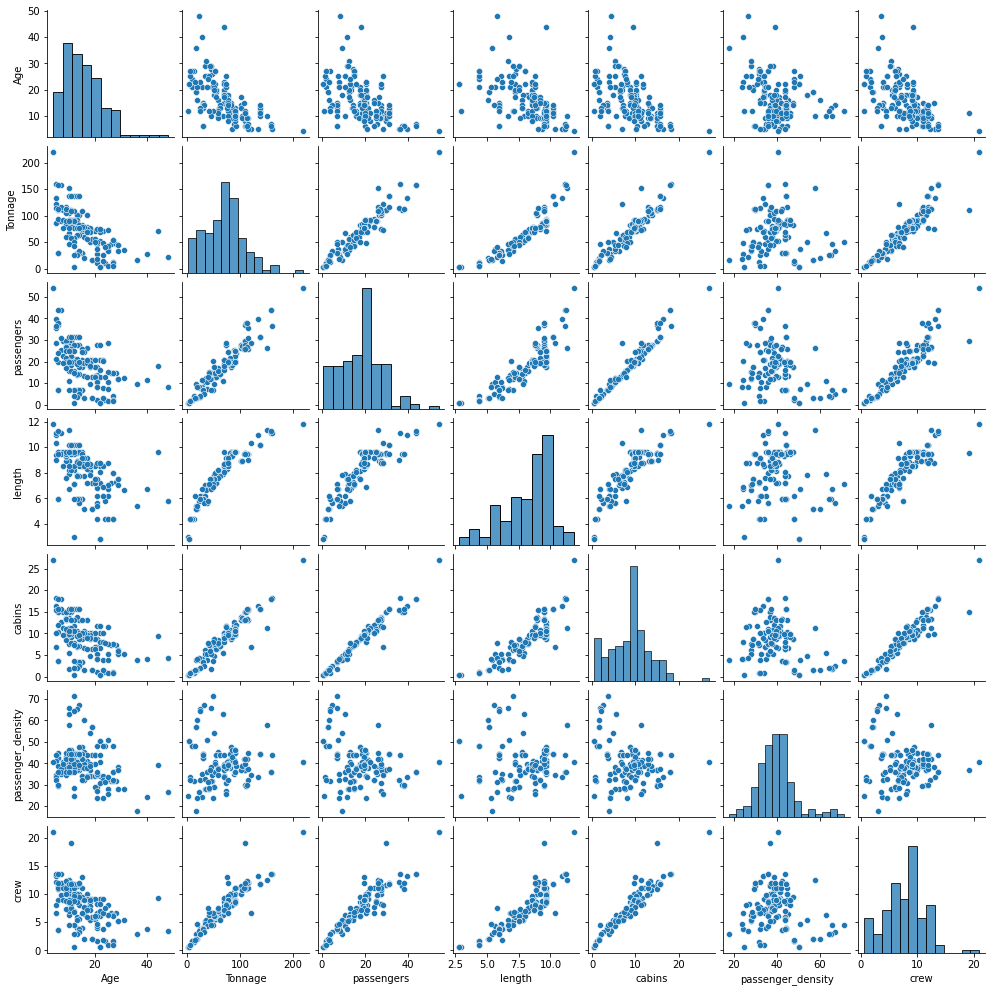

In [5]:
cols = ["Age","Tonnage","passengers","length","cabins","passenger_density","crew"]
sns.pairplot(df[cols],size=2)

c:\users\ahsun\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\ahsun\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\ahsun\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

<AxesSubplot:xlabel='crew', ylabel='Density'>

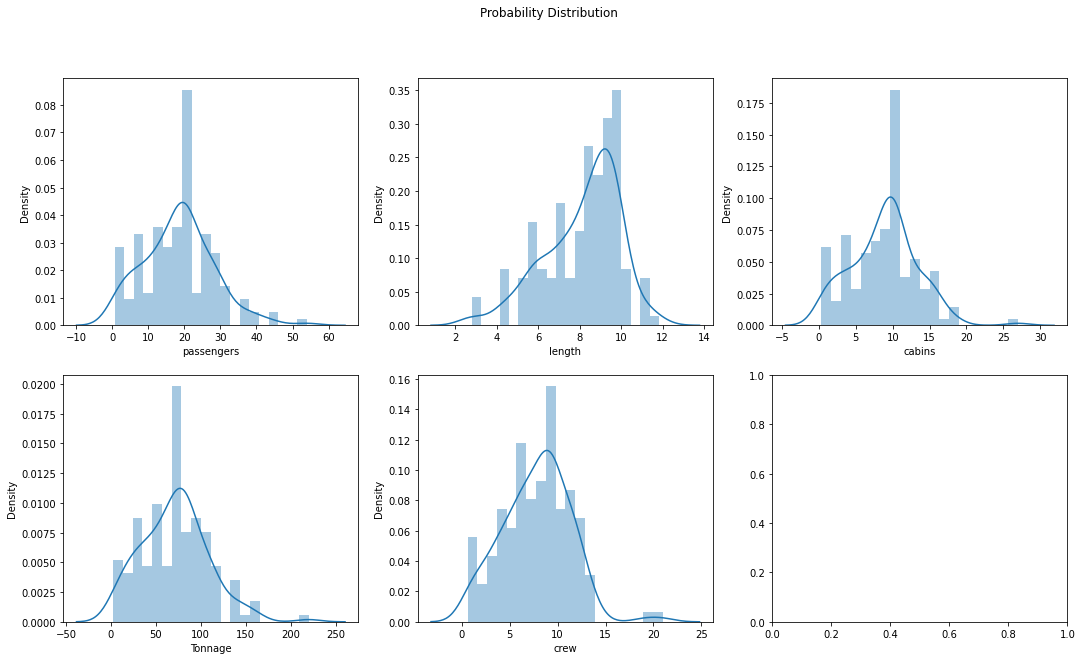

In [6]:
fig, axes = plt.subplots(2,3,figsize=(18,10))
fig.suptitle("Probability Distribution")

sns.distplot(df["passengers"],ax=axes[0,0],bins=20)
sns.distplot(df["length"],ax=axes[0,1],bins=20)
sns.distplot(df["cabins"],ax=axes[0,2],bins=20)
sns.distplot(df["Tonnage"],ax=axes[1,0],bins=20)
sns.distplot(df["crew"],ax=axes[1,1],bins=20)

In [7]:
autoscaler = StandardScaler()
features = df[cols]
df_scaled = pd.DataFrame(autoscaler.fit_transform(df[cols]))
df_scaled.head()
# scaled = autoscaler.fit_transform(df[cols])
# print(scaled)

,0,1,2,3,4,5,6
0,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057,-1.215267
1,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057,-1.215267
2,1.358105,-0.647310,-0.372926,-0.509363,-0.314095,-0.940676,-0.313304
3,-0.617775,1.043215,1.169614,0.782736,1.357341,-0.338017,3.237281
4,0.172577,0.810215,0.825445,0.441533,0.982670,-0.178934,0.631610


In [8]:
arr = df_scaled.to_numpy()
# print(arr)
cov_mat = np.cov(arr.T)
print(cov_mat)

[[ 1.00636943 -0.61051007 -0.51882598 -0.53567624 -0.51326756 -0.28060619
  -0.53403648]
 [-0.61051007  1.00636943  0.9510809   0.92824328  0.95480665 -0.04110641
   0.93347689]
 [-0.51882598  0.9510809   1.00636943  0.8891624   0.9825601  -0.29674522
   0.92106365]
 [-0.53567624  0.92824328  0.8891624   1.00636943  0.89546571 -0.09106483
   0.90156272]
 [-0.51326756  0.95480665  0.9825601   0.89546571  1.00636943 -0.25479336
   0.9568788 ]
 [-0.28060619 -0.04110641 -0.29674522 -0.09106483 -0.25479336  1.00636943
  -0.15649979]
 [-0.53403648  0.93347689  0.92106365  0.90156272  0.9568788  -0.15649979
   1.00636943]]


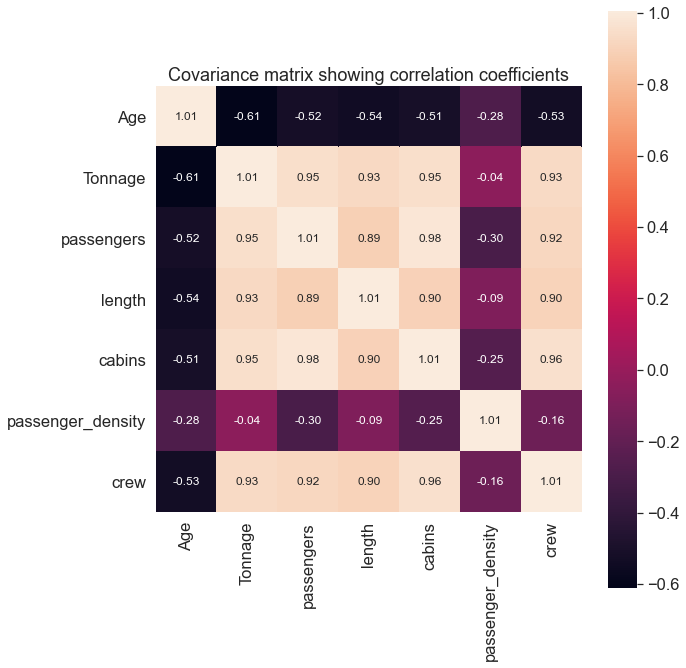

In [9]:
sns.set(font_scale=1.5)
plt.figure(figsize=(10,10))
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

In [476]:
cols_selected = ["Tonnage","passengers","length","cabins","crew"]
data = df[cols_selected].to_numpy()
print(data[0])
np.random.shuffle(data)
print(data[0:2])
train = 0.8
train_data = data[0:int(math.ceil(train*len(data)))]
test_data = data[int(math.ceil(train*len(data))):]
print(data.shape)
print(train_data.shape)
print(test_data.shape)
train_x = train_data[:,0:4]
train_y = train_data[:,4]
print(train_x.shape)
print(train_y.shape)
test_x = test_data[:,0:4]
test_y = test_data[:,4]
print(test_x.shape)
print(test_y.shape)
# train_x = np.expand_dims(train_x,axis=0)
# print(train_x.shape)
# test_x = np.expand_dims(test_x,axis=0)
# print(test_x.shape)

[30.277  6.94   5.94   3.55   3.55 ]
[[86.    21.24   9.63  10.62   9.3  ]
 [30.277  6.94   5.94   3.55   3.55 ]]
(158, 5)
(127, 5)
(31, 5)
(127, 4)
(127,)
(31, 4)
(31,)


In [494]:
from tensorflow.keras.optimizers import Adam
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16,input_shape=train_x.shape),
    tf.keras.layers.Dense(16,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(8,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(8,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=Adam(lr=0.0008),loss="mean_squared_error",metrics=["mean_squared_error"])
model.summary()


Model: "sequential_139"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_671 (Dense)            (None, 127, 16)           80        
_________________________________________________________________
dense_672 (Dense)            (None, 127, 16)           272       
_________________________________________________________________
dense_673 (Dense)            (None, 127, 8)            136       
_________________________________________________________________
dense_674 (Dense)            (None, 127, 8)            72        
_________________________________________________________________
dense_675 (Dense)            (None, 127, 1)            9         
Total params: 569
Trainable params: 569
Non-trainable params: 0
_________________________________________________________________


In [495]:
history = model.fit(train_x,train_y,epochs=50)

Epoch 1/50
4/4 [==============================] - 0s 665us/step - loss: 81.7567 - mean_squared_error: 81.7567
Epoch 2/50
4/4 [==============================] - 0s 332us/step - loss: 73.0928 - mean_squared_error: 73.0928
Epoch 3/50
4/4 [==============================] - 0s 665us/step - loss: 63.3597 - mean_squared_error: 63.3597
Epoch 4/50
4/4 [==============================] - 0s 665us/step - loss: 60.7439 - mean_squared_error: 60.7439
Epoch 5/50
4/4 [==============================] - 0s 333us/step - loss: 57.4340 - mean_squared_error: 57.4340
Epoch 6/50
4/4 [==============================] - 0s 332us/step - loss: 50.1977 - mean_squared_error: 50.1977
Epoch 7/50
4/4 [==============================] - 0s 332us/step - loss: 43.4819 - mean_squared_error: 43.4819
Epoch 8/50
4/4 [==============================] - 0s 665us/step - loss: 39.9003 - mean_squared_error: 39.9003
Epoch 9/50
4/4 [==============================] - 0s 665us/step - loss: 30.4752 - mean_squared_error: 30.4752
Epoch 10/5

<Figure size 432x288 with 0 Axes>

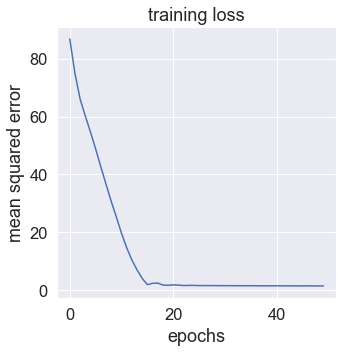

<Figure size 432x288 with 0 Axes>

In [496]:
train_loss = history.history["loss"]
epochs = range(0,len(train_loss))
plt.figure(figsize=(5,5))
plt.plot(epochs,train_loss)
plt.title("training loss")
plt.xlabel("epochs")
plt.ylabel("mean squared error")
plt.figure()

[ 1.9046253  4.684651  11.137201   8.370634  10.114198 ]
[ 1.8   4.38 10.68  9.2  11.09]


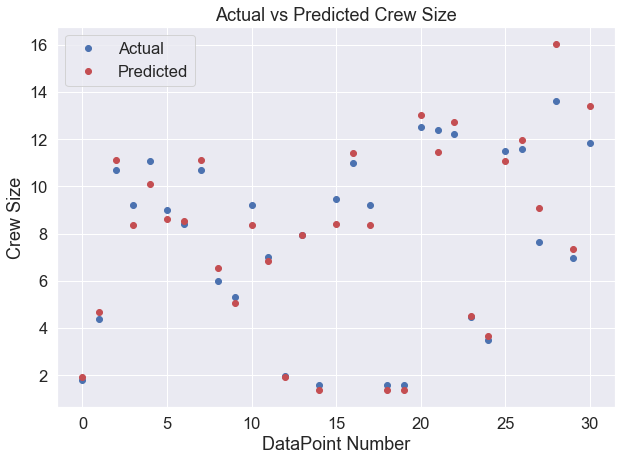

In [498]:
predictions = model.predict(test_x)
predictions = predictions.flatten()
print(predictions[0:5])
original = test_y.T
print(original[0:5])

x = range(0,len(original))
plt.figure(figsize=(10,7))
actual = plt.plot(x,original,"bo",label="Actual")
predicted = plt.plot(x,predictions,"ro",label="Predicted")
plt.title("Actual vs Predicted Crew Size")
plt.ylabel("Crew Size")
plt.xlabel("DataPoint Number")
plt.grid(True)
plt.legend(loc="best")
plt.show()


    